# Data Cleaning for credit card approval project

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#Read the dataset

card_data=pd.read_csv("dataset\AER_credit_card_data.csv")
card_data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [30]:
card_data=card_data.drop(['share'],axis=1)
card_data.head()

,card,reports,age,income,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,546.503300,yes,no,2,64,1,5


# Data Cleaning

In [31]:
#Check Duplicates
duplicate_rows=card_data.duplicated
print("Duplicate rows:")
card_data[duplicate_rows]

Duplicate rows:


,card,reports,age,income,expenditure,owner,selfemp,dependents,months,majorcards,active


In [32]:
#Check NULL values
card_data.isnull().sum()

card           0
reports        0
age            0
income         0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

# Data transformation

In [33]:

card_data.rename(columns={
    'owner':'owner_of_house',
    'income':'yearly_income',
    'expenditure':'monthly_card_expenditure',
    'months':'months_in_current_address',
    'active':'active_credit_accounts'},inplace=True)
card_data.head()

,card,reports,age,yearly_income,monthly_card_expenditure,owner_of_house,selfemp,dependents,months_in_current_address,majorcards,active_credit_accounts
0,yes,0,37.66667,4.5200,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,546.503300,yes,no,2,64,1,5


In [34]:
card_data['age']=card_data['age'].astype(int)
card_data['yearly_income']=(card_data['yearly_income']*10000).astype(int)
card_data['monthly_card_expenditure']=card_data['monthly_card_expenditure'].astype(int)
card_data['dependents']=card_data['dependents'].apply(lambda x: x-1 if x!=0 else x)
card_data.head()

,card,reports,age,yearly_income,monthly_card_expenditure,owner_of_house,selfemp,dependents,months_in_current_address,majorcards,active_credit_accounts
0,yes,0,37,45199,124,yes,no,2,54,1,12
1,yes,0,33,24200,9,no,no,2,34,1,13
2,yes,0,33,45000,15,yes,no,3,58,1,5
3,yes,0,30,25400,137,no,no,0,25,1,7
4,yes,0,32,97867,546,yes,no,1,64,1,5


In [36]:
value_map={'yes':1,'no':0}
card_data['card']=card_data['card'].map(value_map)
card_data['owner_of_house']=card_data['owner_of_house'].map(value_map)
card_data['selfemp']=card_data['selfemp'].map(value_map)
card_data.head()

,card,reports,age,yearly_income,monthly_card_expenditure,owner_of_house,selfemp,dependents,months_in_current_address,majorcards,active_credit_accounts
0,1,0,37,45199,124,1,0,2,54,1,12
1,1,0,33,24200,9,0,0,2,34,1,13
2,1,0,33,45000,15,1,0,3,58,1,5
3,1,0,30,25400,137,0,0,0,25,1,7
4,1,0,32,97867,546,1,0,1,64,1,5


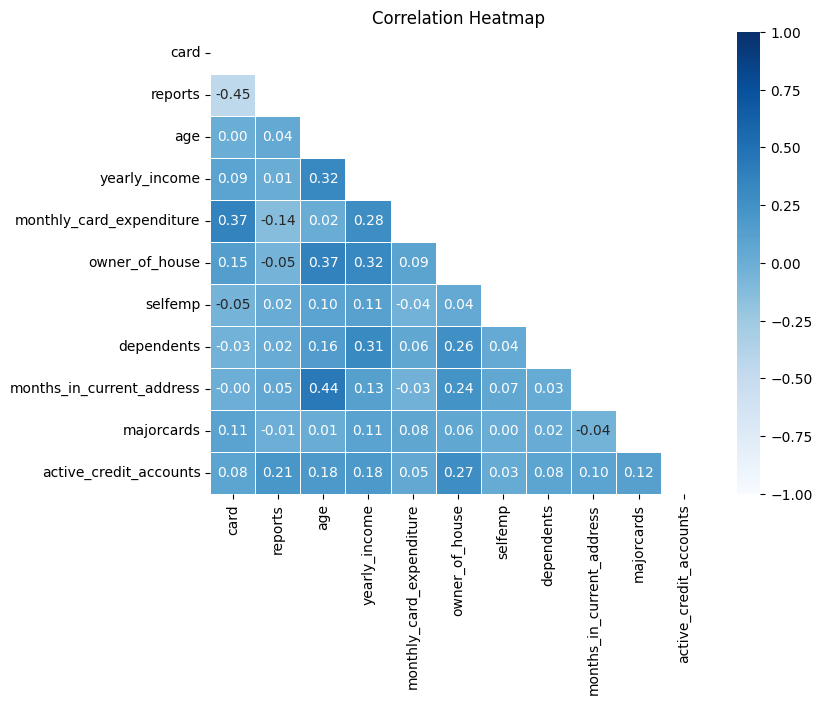

In [39]:
# Checking Corelation
corr_matrix=card_data.corr()

#Only show Lower traingular value
mask=np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, cmap=plt.get_cmap('Blues'), fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()


In [40]:
# Lading the data to a new csv file
card_data.to_csv("dataset\AER_credit_card_data_cleaned.csv",index=False)